---
# Part 1: Visualising Interaction Logs
---

## Prerequisites

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
#Corey's Colour Blind Tools 
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

CB_color_dict = {'blue':'#377eb8',
                 'orange': '#ff7f00',
                 'green': '#4daf4a',
                 'pink': '#f781bf', 
                 'brown': '#a65628',
                 'purple': '#984ea3',
                 'grey': '#999999', 
                 'black': '#000000',
                 'red': '#e41a1c', 
                 'yellow': '#dede00'}

## Simple File Read

In [3]:
#file_path = "/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-1/"
#interaction_log = pd.read_csv(file_path + "interactions.csv")

In [4]:
#interaction_log.head()

In [5]:
#interaction_log.describe()

## Click Visualisation

In [6]:
#draw clicks
import matplotlib.animation as animation
def drawClicks(log):
    x = log.x
    y = log.y

    fig, ax = pp.subplots()
    ax.scatter(x,y,color=CB_color_dict["blue"], alpha=0.1, s=1000.0)

    myPlot = matplotlib.pyplot.gcf()
    myPlot.set_size_inches(12, 8) #inches

## Prepare Data

In [7]:
def prepareLogs(log):
    log["ones"] = np.ones(int(log.x.size)) 
    return log
# interaction_log = prepareLogs(interaction_log)
# interaction_log.head()

## Categorise Interaction's Into A Descriptive Model

In [8]:
def categoriseBins(log):
    #code data into bins 
    #=========================================================================================================================
    pattern = log[log.description.str.contains("note") == True]
    #=========================================================================================================================
    navigate = log[log.description.str.contains("tab") == True]
    navigate = navigate.append(log[log.description.str.contains("bar selected") == True])
    #=========================================================================================================================
    playback = log[log.description.str.contains("play clicked") == True]
    playback = playback.append(log[log.description.str.contains("stop") == True])
    #=========================================================================================================================
    helps = log[log.description.str.contains("tutorial") == True]
    #=========================================================================================================================
    building = log[log.description.str.contains("drag") == True]
    building = building.append(log[log.description.str.contains("connection") == True])
    building = building.append(log[log.description.str.contains("was deleted") == True])
    building = building.append(log[log.description.str.contains("block added") == True])
    #=========================================================================================================================
    parameter = log[log.description.str.contains("increased") == True]
    parameter = parameter.append(log[log.description.str.contains("cremented") == True])
    parameter = parameter.append(log[log.description.str.contains("cremented") == True])
    parameter = parameter.append(log[log.description.str.contains("decreased") == True])
    parameter = parameter.append(log[log.description.str.contains("array button clicked") == True])
    parameter = parameter.append(log[log.description.str.contains("set to") == True])
    #=========================================================================================================================
    saving = log[log.description.str.contains("menu bar pressed") == True]
    saving = saving.append(log[log.description.str.contains("new clicked") == True])
    saving = saving.append(log[log.description.str.contains("load clicked") == True])
    saving = saving.append(log[log.description.str.contains("save clicked") == True])
    saving = saving.append(log[log.description.str.contains("save as clicked") == True])
    #==========================================================================================================================
    repeat = log[log.description.str.contains("copied") == True]
    repeat = repeat.append(log[log.description.str.contains("pasted") == True])
#     repeat = repeat.append(interaction_log[interaction_log.description.str.contains("endrepeat and") == True])
#     repeat = repeat.append(interaction_log[interaction_log.description.str.contains("and endrepeat") == True])
    return [pattern, navigate, playback, helps, building, parameter, saving, repeat]

# bins = categoriseBins(interaction_log)

## Visualise This Compositions Interaction

In [9]:
def drawTimeline(my_file_path, bins = [], *args):
# [pattern, navigate, playback, helps, building, parameter, saving, repeat]
    colours = [CB_color_dict['yellow'], 
               CB_color_dict['brown'],
               CB_color_dict['green'],
               CB_color_dict['orange'],
               CB_color_dict['blue'],
               CB_color_dict['purple'],
               CB_color_dict['red'],
               CB_color_dict['black']]
    
    labels = ['note-edit', 
               'navigate',
               'playback',
               'help',
               'building',
               'param-change',
               'saving',
               'clipboard']
    
    for i in range(len(bins)):
        if (bins[i].index.size > 0):
            pp.stem(bins[i].elapsedtime, 
                    bins[i].ones, 
                    colours[i], 
                    markerfmt=' ', 
                    label=labels[i], 
                    use_line_collection=True, 
                    basefmt=" ")

    print(my_file_path)
    
    pp.rcParams["figure.figsize"] = [15,5]
    pp.legend(loc=(1.01,0.655))
    pp.xlabel("Time (milliseconds)")
    pp.yticks([]) #hide y axis 
    pp.savefig(my_file_path + "visualisation.png")
    pp.show()

## Iterate to visualise all compositions

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-1/


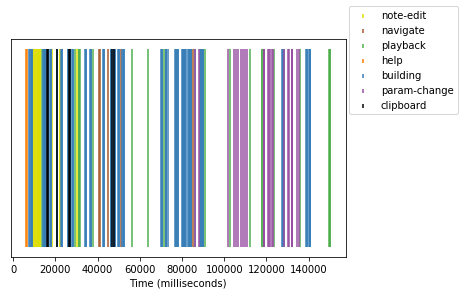

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-2/


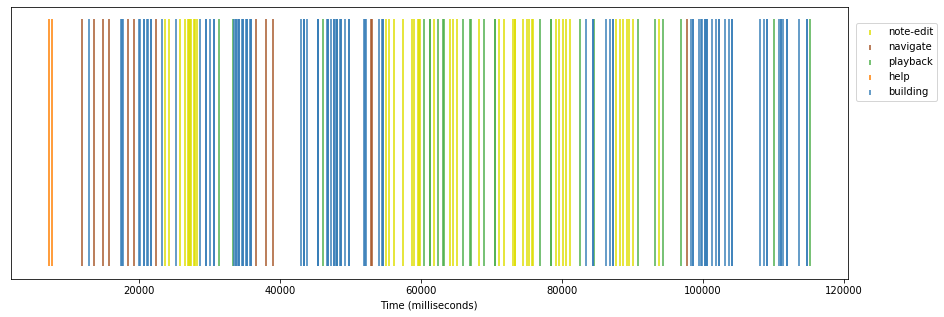

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-3/


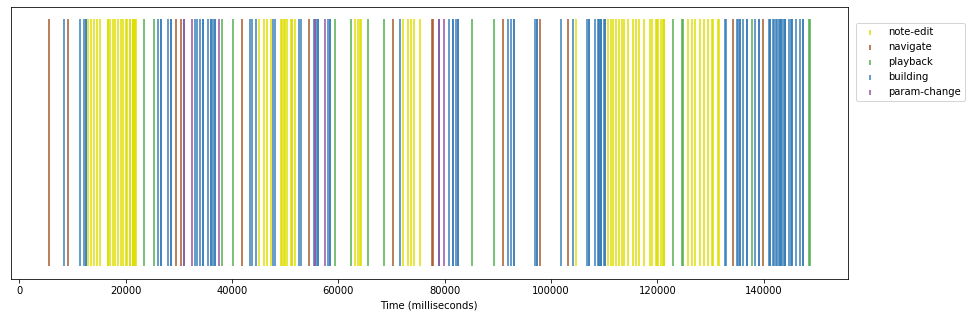

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-4/


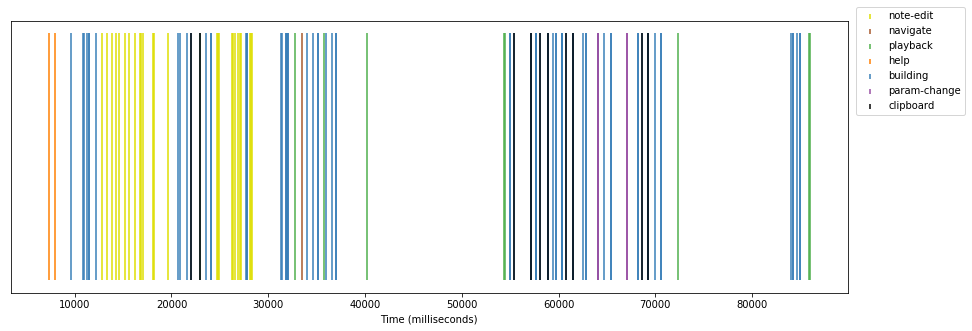

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-5/


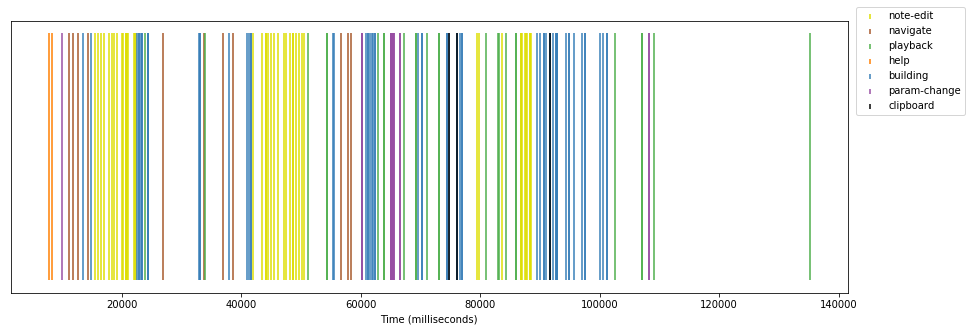

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-6/


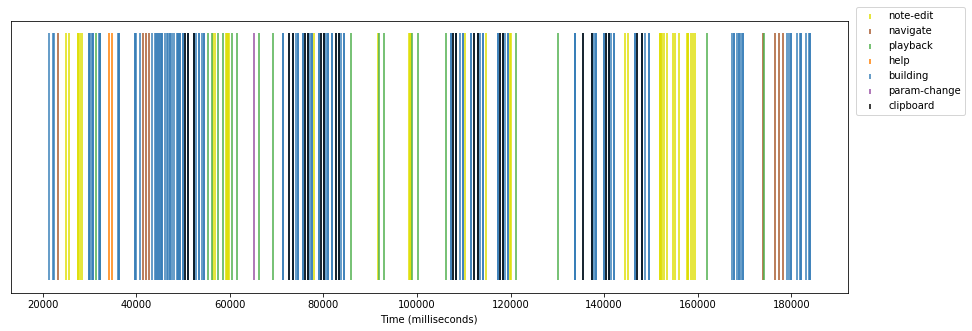

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-7/


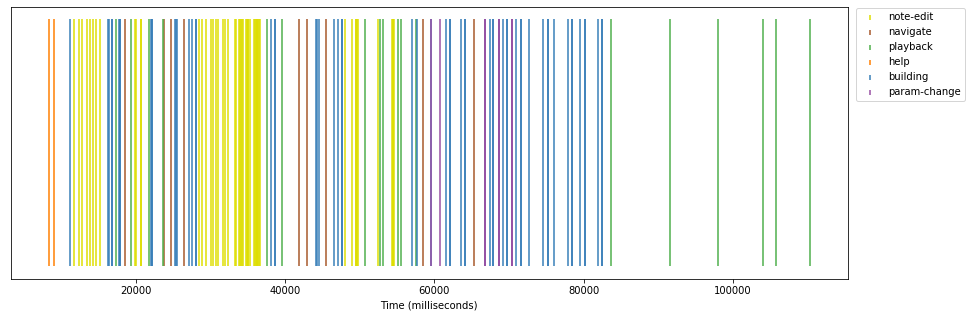

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-8/


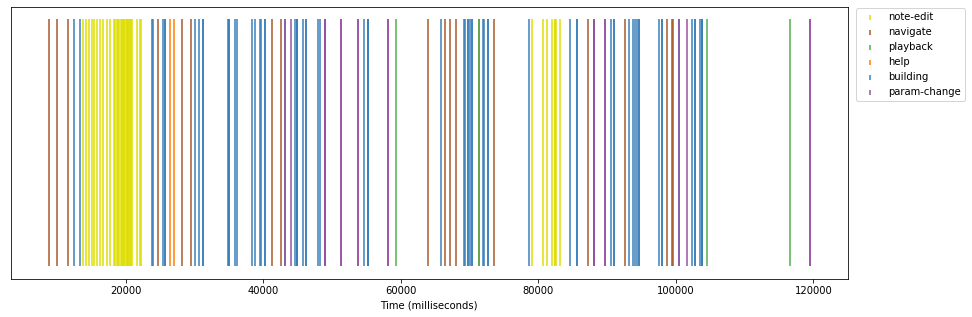

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-9/


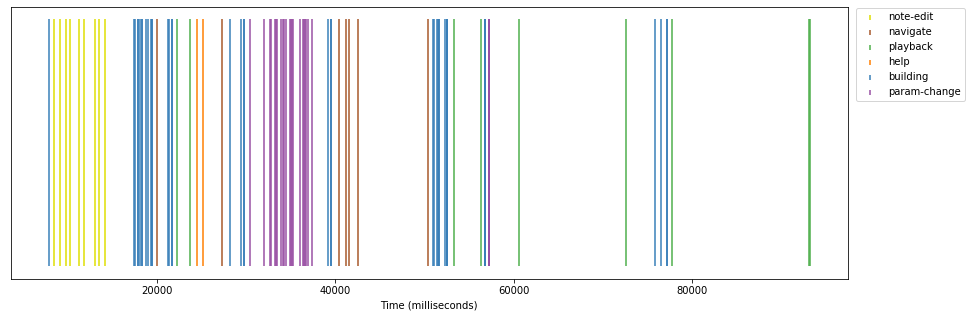

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-10/


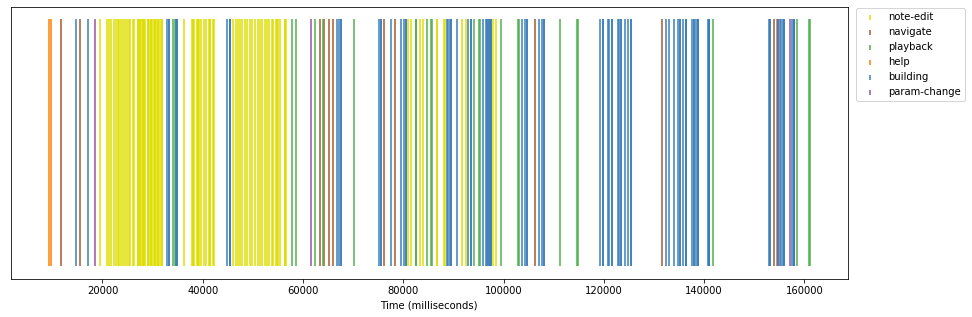

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-11/


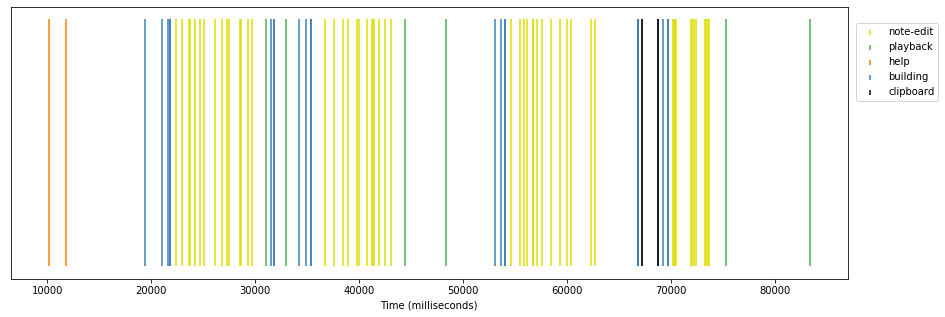

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-12/


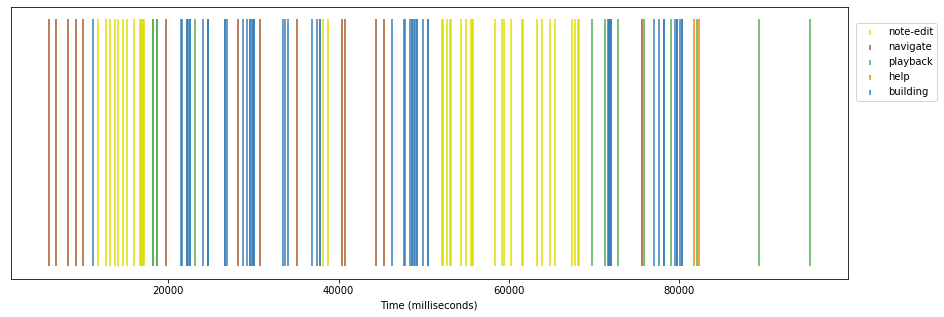

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-13/


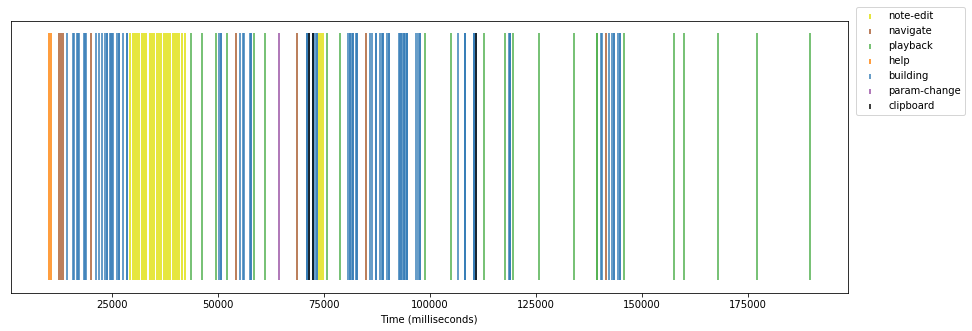

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-14/


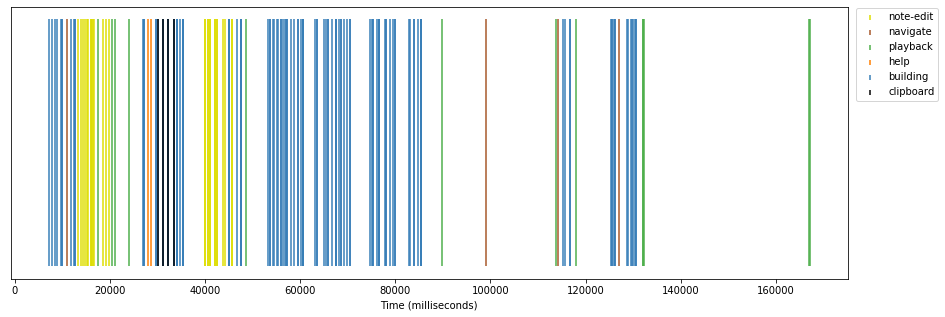

In [10]:
for i in range(1,15):
    file_path = "/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-" + str(i)+ "/"
    my_log = pd.read_csv(file_path + "interactions.csv")    
    my_log = prepareLogs(my_log)
    my_bins = categoriseBins(my_log)
    drawTimeline(file_path, my_bins)

---
# Part 2: Simple Objective Metrics
---

In [11]:
def get_simple_dataset():
    # create the data frame based on the creativity metric 
    creativity_assessment_scores = {'Creativity' : [2.54, 3.73, 3.31, 3.31, 3.27, 3.81, 3.35, 4.27, 3.42, 4.31, 1.54, 3.00, 3.42, 3.77]}

    total_data = pd.DataFrame(creativity_assessment_scores) 

    #iterate over all of the possible categories...
    labels = [ 'note-edit', 
               'navigate',
               'playback',
               'help',
               'building',
               'param-change',
               'saving',
               'clipboard', 
               'total']

    for i in range(len(labels)):
        total_metrics = []
        #for all of the files get the needed metrics... 
        for j in range(1,15):#... for 15 total users
            file_path = "/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-" + str(j)+ "/"
            my_log = pd.read_csv(file_path + "interactions.csv")    
            my_bins = categoriseBins(my_log)
            
            if labels[i] is not 'total': 
                total_metrics.append(my_bins[i].index.size)
            else:
                total_metrics.append(my_log.index.size) #for the total 
            
        total_data[labels[i]+"-count"] = total_metrics
    
    return total_data

data = get_simple_dataset()

In [12]:
data.head()

,Creativity,note-edit-count,navigate-count,playback-count,help-count,building-count,param-change-count,saving-count,clipboard-count,total-count
0,2.54,26,5,21,2,115,31,0,7,208
1,3.73,47,13,27,2,104,0,0,0,194
2,3.31,76,14,16,0,102,7,0,0,216
3,3.31,38,1,8,2,102,4,0,10,164
4,3.27,54,11,25,2,75,17,0,3,180


In [13]:
data.describe()

,Creativity,note-edit-count,navigate-count,playback-count,help-count,building-count,param-change-count,saving-count,clipboard-count,total-count
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.000000,14.000000
mean,3.360714,46.428571,8.857143,16.500000,1.857143,99.500000,8.571429,0.0,3.714286,185.000000
std,0.700159,20.909013,5.303948,7.633429,0.534522,65.372012,10.860757,0.0,6.341907,76.358466
min,1.540000,9.000000,0.000000,4.000000,0.000000,30.000000,0.000000,0.0,0.000000,98.000000
25%,3.280000,38.000000,5.500000,10.250000,2.000000,65.750000,0.250000,0.0,0.000000,149.500000
50%,3.385000,43.500000,8.500000,17.000000,2.000000,100.000000,4.000000,0.0,1.000000,176.500000
75%,3.760000,53.750000,12.500000,22.500000,2.000000,104.750000,14.750000,0.0,3.750000,204.500000
max,4.310000,94.000000,19.000000,27.000000,2.000000,305.000000,31.000000,0.0,23.000000,409.000000


## Investigate Creativity Metric & Correlates

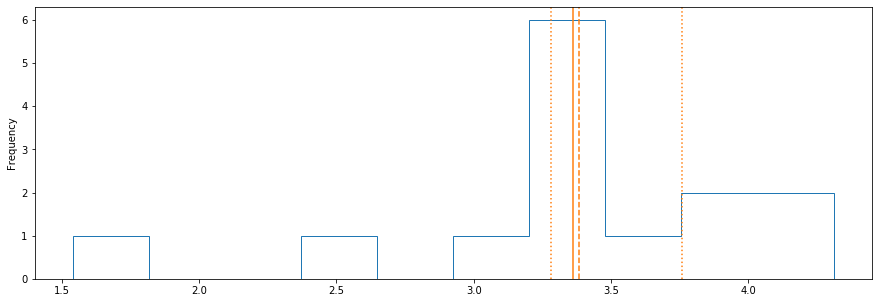

In [14]:
# data['Creativity'].hist(bins=10, figsize=(5,4))
data['Creativity'].plot(kind='hist',histtype='step',bins=10)

pp.axvline(data['Creativity'].mean(),c='C1')
pp.axvline(data['Creativity'].median(),c='C1',linestyle='--')
pp.axvline(data['Creativity'].quantile(0.25),c='C1',linestyle=':')
pp.axvline(data['Creativity'].quantile(0.75),c='C1',linestyle=':')

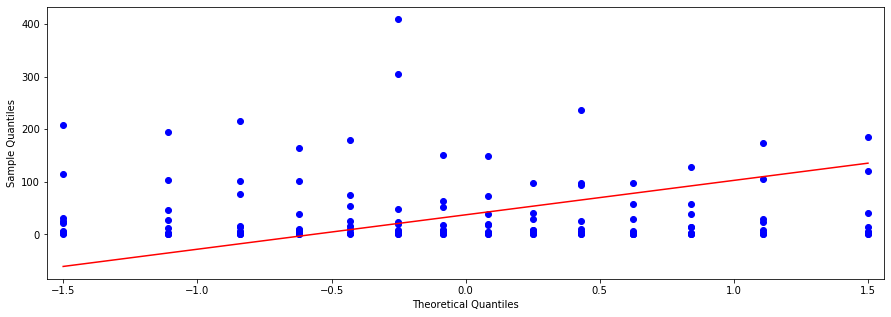

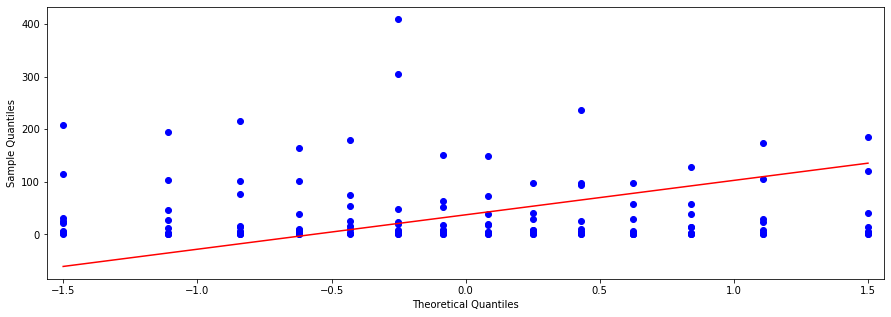

In [15]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data, line='s')

In [16]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.621, p=0.000
Sample does not look Gaussian (reject H0)


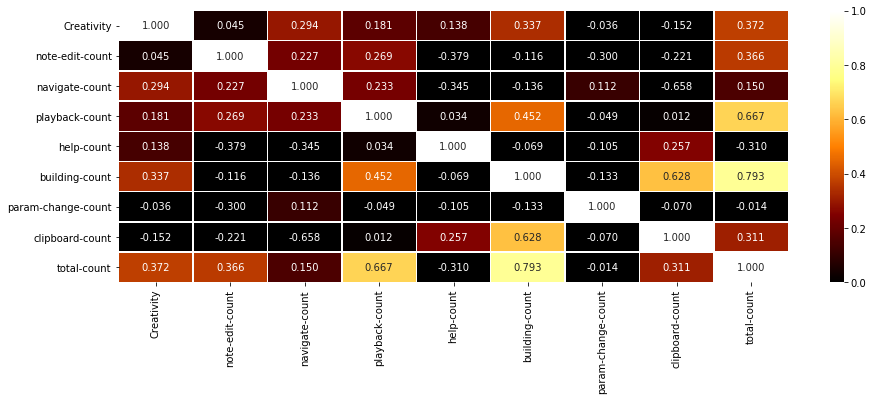

In [17]:
correl_data = data.drop("saving-count", 1)
corr = correl_data.corr(method='spearman')
import seaborn as sns
sns.heatmap(corr,  vmin=0, vmax=1, annot=True, fmt=".3f", linewidths=.5, cmap="afmhot")

In [18]:
#lets group by 3, above below and inbetween the 75 % 25 percentiles, see part 3
data["Creativity"].describe()

count    14.000000
mean      3.360714
std       0.700159
min       1.540000
25%       3.280000
50%       3.385000
75%       3.760000
max       4.310000
Name: Creativity, dtype: float64

# Part 3: Categorical Creativity

In [19]:
#least_creative
least_creative = data[data["Creativity"] <= data["Creativity"].quantile(0.25)]

#some_creative
temp = data[data["Creativity"] > data["Creativity"].quantile(0.25)]
some_creative = temp[data["Creativity"] <= data["Creativity"].quantile(0.5)]

#mostly_creative
temp = data[data["Creativity"] > data["Creativity"].quantile(0.5)]
mostly_creative = temp[data["Creativity"] <= data["Creativity"].quantile(0.75)]


#very_creative
very_creative = data[data["Creativity"] > data["Creativity"].quantile(0.75)]

assert(data.index.size == (least_creative.index.size + some_creative.index.size + mostly_creative.index.size + very_creative.index.size))

/Users/coreyford/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/coreyford/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [20]:
least_creative

,Creativity,note-edit-count,navigate-count,playback-count,help-count,building-count,param-change-count,saving-count,clipboard-count,total-count
0,2.54,26,5,21,2,115,31,0,7,208
4,3.27,54,11,25,2,75,17,0,3,180
10,1.54,57,0,6,2,30,0,0,2,98
11,3.00,39,14,14,2,58,0,0,0,128


Text(0, 0.5, '%age of total interactions in category')

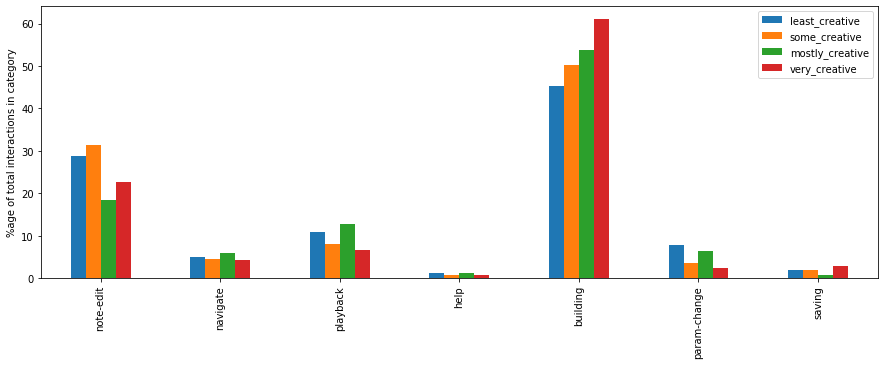

In [106]:
def get_group_percentage_for_category(category):
    percentage_of_categories_log = { "category": category,
                                     "least_creative": [least_creative[category].sum() / least_creative["total-count"].sum() * 100],
                                     "some_creative": [some_creative[category].sum() / some_creative["total-count"].sum() * 100],
                                     "mostly_creative": [mostly_creative[category].sum() / mostly_creative["total-count"].sum() * 100],
                                     "very_creative": [very_creative[category].sum() / very_creative["total-count"].sum() * 100] } 

    return pd.DataFrame(percentage_of_categories_log)

#====================================================================================================================================

shown_categories = ['note-edit',
                    'navigate',
                    'playback',           
                    'help',
                    'building',
                    'param-change',
                    'clipboard']

for label in shown_categories:
    if(label == 'note-edit'):
        #first category 
        df = get_group_percentage_for_category(label+"-count")
    else:
        df = df.append(get_group_percentage_for_category(label+"-count"))  
        

# pp.bar(df.category,df)
# pp.rcParams["figure.figsize"] = [15,5]
# pp.legend(loc=(1.01,0.655))
# pp.xlabel("Time (milliseconds)")
# pp.yticks([]) #hide y axis 
# pp.savefig(my_file_path + "visualisation.png")
# pp.show()
    
ax.set_title('Interactions shown across creativeness')
df.set_index("category")
ax = df.plot(kind="bar")

ax.set_xticklabels(labels)
pp.ylabel("%age of total interactions in category")
